In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
Df = pd.get_dummies(df,columns=["Undergrad", "Marital.Status", "Urban"], drop_first = True)
Df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [5]:
Df['Taxable.Income']

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [6]:
Df['Taxinc'] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [7]:
Df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [8]:
Df['Taxinc'].value_counts()

Good     476
Risky    124
Name: Taxinc, dtype: int64

In [9]:
DF= pd.get_dummies(Df,columns=['Taxinc'],drop_first=True)


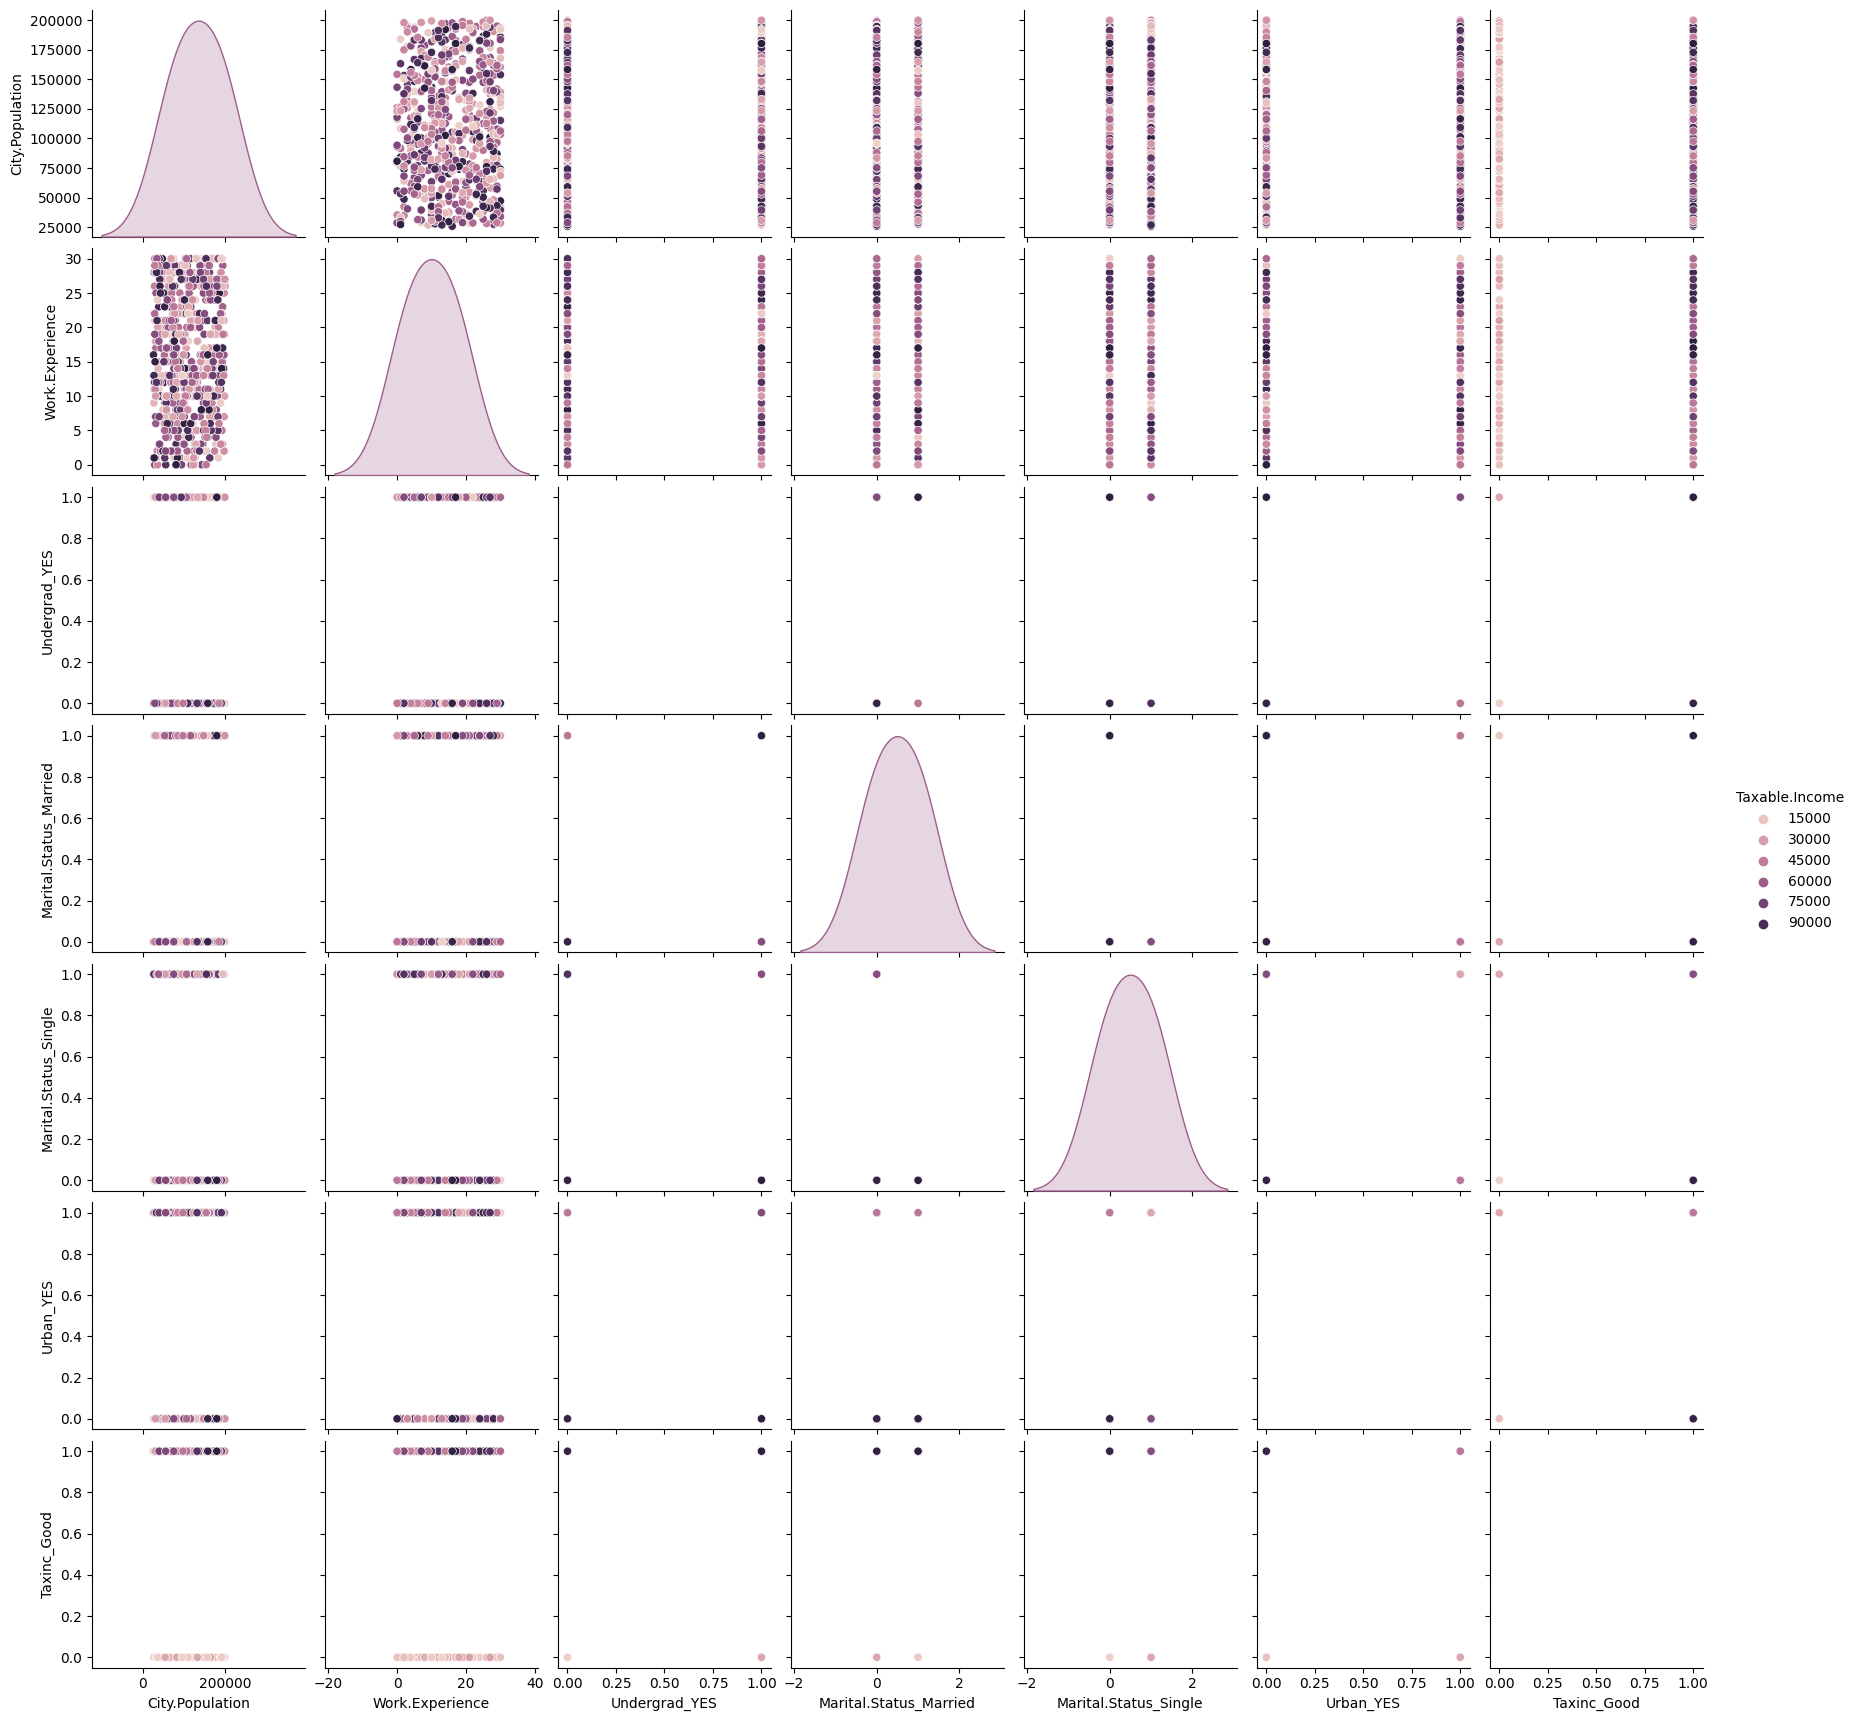

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data= DF, hue='Taxable.Income')

In [41]:
# Bar graph
import plotly.express as px
Marital_Status = DF['Marital.Status_Married'].value_counts()
fig_Marital_Status = px.bar(Marital_Status,
                    x = Marital_Status.index,
                    y = Marital_Status.values,
                         )
fig_Marital_Status.show()

In [12]:
DF

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [13]:
DF = DF.rename({'Marital.Status_Married':'Marital.Status_Married', 'Marital.Status_Single':'Marital.Status_Single'})
DF

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable.Income          600 non-null    int64
 1   City.Population         600 non-null    int64
 2   Work.Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Marital.Status_Married  600 non-null    uint8
 5   Marital.Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
 7   Taxinc_Good             600 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 21.7 KB


In [15]:
DF['Taxinc_Good'].value_counts()

1    476
0    124
Name: Taxinc_Good, dtype: int64

In [16]:
X = DF.iloc[:,0:7]
Y = DF['Taxinc_Good']

In [17]:
X

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [18]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxinc_Good, Length: 600, dtype: uint8

In [19]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=20)
X_train

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
121,20391,86648,16,1,1,0,1
263,70712,69386,21,1,1,0,1
197,66905,98056,4,0,0,1,1
93,15296,137676,3,1,1,0,1
74,32434,182319,17,0,0,0,0
...,...,...,...,...,...,...,...
218,57794,38091,19,0,1,0,0
223,38374,192297,17,1,1,0,1
271,42254,183682,20,0,0,1,0
474,99128,80729,0,1,0,0,0


In [20]:
X_test

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
493,17183,103226,29,0,1,0,0
172,13068,52819,23,0,1,0,1
352,15627,72115,16,0,0,0,1
506,23884,111105,8,0,0,1,1
595,76340,39492,7,1,0,0,1
...,...,...,...,...,...,...,...
536,40674,157025,14,0,0,1,0
422,99311,191983,14,0,0,0,1
191,70819,176341,7,0,0,1,1
21,14310,29106,7,1,0,0,1


In [21]:
Y_train, Y_test

(121    0
 263    1
 197    1
 93     0
 74     1
       ..
 218    1
 223    1
 271    1
 474    1
 355    1
 Name: Taxinc_Good, Length: 480, dtype: uint8,
 493    0
 172    0
 352    0
 506    0
 595    1
       ..
 536    1
 422    1
 191    1
 21     0
 105    1
 Name: Taxinc_Good, Length: 120, dtype: uint8)

In [22]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.75, 'x[0] <= 30055.5\nentropy = 0.73\nsamples = 480\nvalue = [98, 382]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 382\nvalue = [0, 382]')]

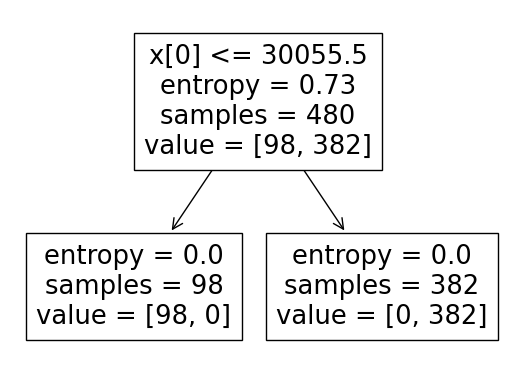

In [23]:
from sklearn import tree
tree.plot_tree(model)

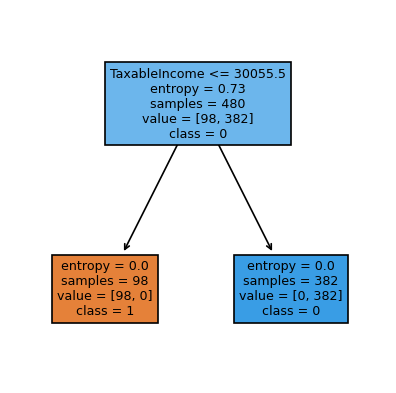

In [24]:
import matplotlib.pyplot as plt
fn=['TaxableIncome','CityPopulation','WorkExperience','Undergrad_YES','MaritalStatus_Married', 'MaritalStatus_Single', 'Urban_YES']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=120)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [25]:
# Prediction on test data
preds = model.predict(X_test)
pd.Series(preds).value_counts()

1    94
0    26
dtype: int64

In [26]:
preds

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [27]:
preds ==Y_test

493    True
172    True
352    True
506    True
595    True
       ... 
536    True
422    True
191    True
21     True
105    True
Name: Taxinc_Good, Length: 120, dtype: bool

In [28]:
np.mean(preds ==Y_test)

1.0

In [29]:
model.score(X_train, Y_train)

1.0

Building Decession tree using Gini Criteria

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gin =DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gin.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
array = df.values
X = array[:,[2,3,4]]
Y = array[:,5:]

In [33]:
X

array([[68833, 50047, 10],
       [33700, 134075, 18],
       [36925, 160205, 30],
       ...,
       [47334, 154058, 0],
       [98592, 180083, 17],
       [96519, 158137, 16]], dtype=object)

In [59]:
Y

array([['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
     

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=1)

In [36]:
from sklearn.preprocessing import LabelEncoder
# Creating LabelEncoder instance
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train_encoded)

DecisionTreeRegressor()

In [38]:
# Finding Accuracy
model.score(X_train,y_train_encoded)

1.0